<a href="https://colab.research.google.com/github/marcinwolter/MachineLearning2020/blob/main/plot_mnist_filters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
%matplotlib inline


# Visualization of MLP weights on MNIST


Sometimes looking at the learned coefficients of a neural network can provide
insight into the learning behavior. For example if weights look unstructured,
maybe some were not used at all, or if very large coefficients exist, maybe
regularization was too low or the learning rate too high.

This example shows how to plot some of the first layer weights in a
MLPClassifier trained on the MNIST dataset.

The input data consists of 28x28 pixel handwritten digits, leading to 784
features in the dataset. Therefore the first layer weight matrix have the shape
(784, hidden_layer_sizes[0]).  We can therefore visualize a single column of
the weight matrix as a 28x28 pixel image.

To make the example run faster, we use very few hidden units, and train only
for a very short time. Training longer would result in weights with a much
smoother spatial appearance.


In [13]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier

print(__doc__)

# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X / 255.

# rescale the data, use the traditional train/test split
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

mlp = MLPClassifier(alpha=0.05, max_iter=10000,solver='adam', random_state=1,
                hidden_layer_sizes=[16, 16],early_stopping=True,
                verbose=10, tol=0.00001)

mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))




print(mlp.hidden_layer_sizes[0])
print(mlp.n_outputs_)
print(mlp.coefs_[0].shape)
print(mlp.coefs_[1].shape)
print(mlp.coefs_[2].shape)

Iteration 1, loss = 0.93393237
Validation score: 0.893833
Iteration 2, loss = 0.33166201
Validation score: 0.908000
Iteration 3, loss = 0.28629478
Validation score: 0.922500
Iteration 4, loss = 0.26186653
Validation score: 0.922333
Iteration 5, loss = 0.24598687
Validation score: 0.929333
Iteration 6, loss = 0.23439863
Validation score: 0.931833
Iteration 7, loss = 0.22372489
Validation score: 0.934833
Iteration 8, loss = 0.21435388
Validation score: 0.934500
Iteration 9, loss = 0.20785932
Validation score: 0.937500
Iteration 10, loss = 0.20142145
Validation score: 0.938833
Iteration 11, loss = 0.19597279
Validation score: 0.936833
Iteration 12, loss = 0.19201146
Validation score: 0.939167
Iteration 13, loss = 0.18743465
Validation score: 0.940667
Iteration 14, loss = 0.18435623
Validation score: 0.941667
Iteration 15, loss = 0.18003092
Validation sc

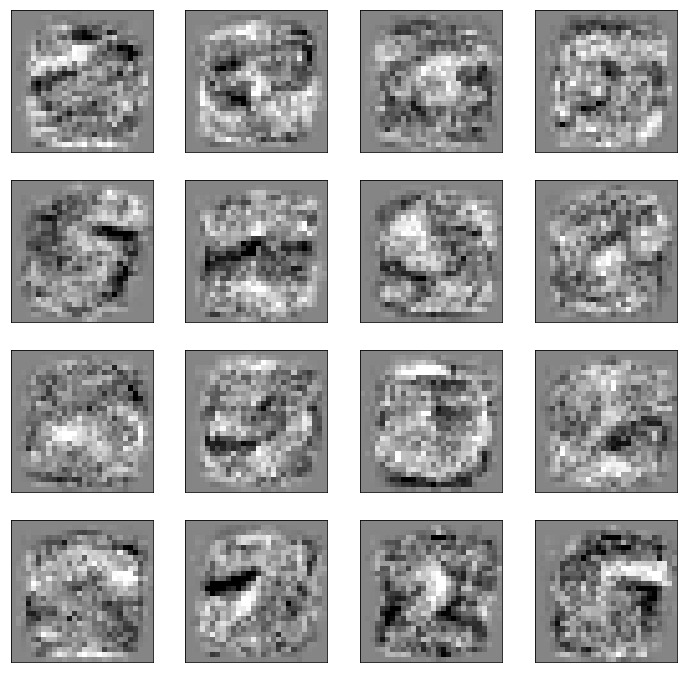

<Figure size 1440x1440 with 0 Axes>

In [28]:
fig, axes = plt.subplots(4, 4)
fig.set_size_inches(12,12)

fig = plt.figure(figsize=(20, 20))

# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()